In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# 데이터 전처리 (Wine Data)

In [2]:
raw_data = pd.read_csv('wine-clustering.csv')
raw_data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
raw_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### 결측치 없음, 전처리 필요 없음 => 사이킷런에서 자동으로 Standardization 해준다

## 데이터를 3차원으로 PCA => 시각화 위해서

In [4]:
pca = PCA(n_components = 3)

In [5]:
data = pca.fit_transform(raw_data)

### 주성분 확인

In [6]:
pca.components_

array([[ 1.65926472e-03, -6.81015556e-04,  1.94905742e-04,
        -4.67130058e-03,  1.78680075e-02,  9.89829680e-04,
         1.56728830e-03, -1.23086662e-04,  6.00607792e-04,
         2.32714319e-03,  1.71380037e-04,  7.04931645e-04,
         9.99822937e-01],
       [ 1.20340617e-03,  2.15498184e-03,  4.59369254e-03,
         2.64503930e-02,  9.99344186e-01,  8.77962152e-04,
        -5.18507284e-05, -1.35447892e-03,  5.00440040e-03,
         1.51003530e-02, -7.62673115e-04, -3.49536431e-03,
        -1.77738095e-02],
       [-1.68738094e-02, -1.22003373e-01, -5.19874304e-02,
        -9.38593003e-01,  2.97802484e-02,  4.04846439e-02,
         8.54433387e-02, -1.35107797e-02,  2.46593824e-02,
        -2.91398464e-01,  2.59776624e-02,  7.03239693e-02,
        -4.52868159e-03]])

### 분산 비율 확인

In [7]:
pca.explained_variance_ratio_

array([9.98091230e-01, 1.73591562e-03, 9.49589576e-05])

## 시각화 (3차원 그래프)

In [8]:
from mpl_toolkits.mplot3d import Axes3D

In [9]:
feature1 = []
feature2 = []
feature3 = []

for sample in data:
    feature1.append(sample[0])
    feature2.append(sample[1])
    feature3.append(sample[2])

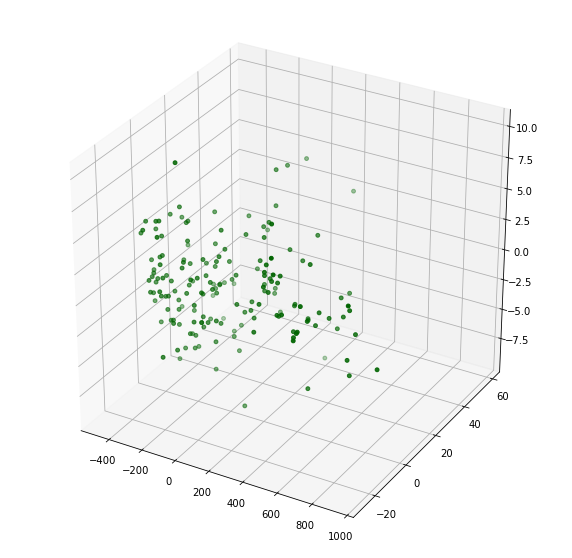

In [10]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.scatter(feature1, feature2, feature3, marker='o', s=15, c='darkgreen')

plt.show()

# Clustering by K-Means

In [11]:
Ks = range(1, 10 + 1)
inertias = []

for i in range(1, 10 + 1):
    model = KMeans(n_clusters=i)
    model.fit(data)
    inertias.append(model.inertia_)

### inertia 값 시각화

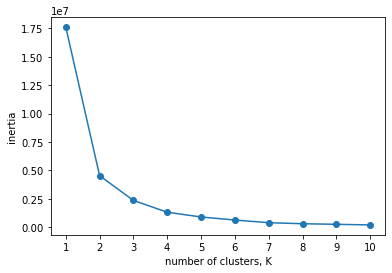

In [12]:
plt.plot(Ks, inertias, '-o')
plt.xlabel('number of clusters, K')
plt.ylabel('inertia')
plt.xticks(Ks)
plt.show()

### K는 3 ~ 5 가 적당할 듯 싶다

## K = 3 일 때 Clustering 결과 시각화

In [13]:
model = KMeans(n_clusters=3)
model.fit(data)

labels = pd.DataFrame(model.predict(data))
labels.columns = ['result']

In [14]:
data = pd.DataFrame(data)

result = pd.concat([data, labels], axis=1)
result

,0,1,2,result
0,318.562979,21.492131,3.130735,1
1,303.097420,-5.364718,6.822835,1
2,438.061133,-6.537309,-1.113223,1
3,733.240139,0.192729,-0.917257,1
4,-11.571428,18.489995,-0.554422,0
...,...,...,...,...
173,-6.980211,-4.541137,-2.474707,0
174,3.131605,2.335191,-4.309931,0
175,88.458074,18.776285,-2.237577,0
176,93.456242,18.670819,-1.788392,0


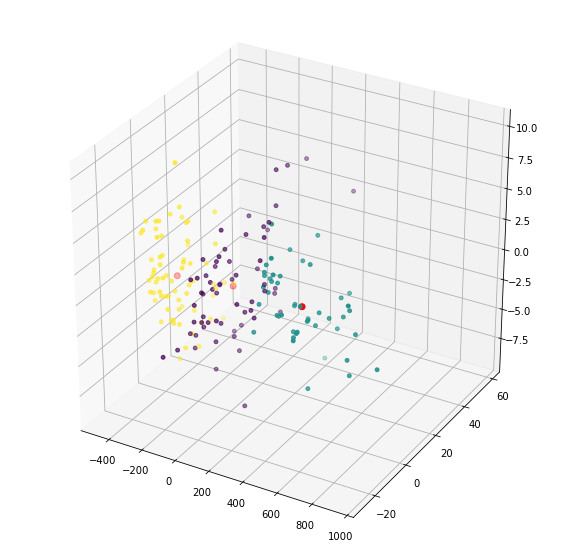

In [15]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.scatter(result[0], result[1], result[2], marker='o', s=15, c=result['result'])

# Centroid 표시
centroids = pd.DataFrame(model.cluster_centers_,columns=['feature_x', 'feature_y', 'feature_z'])
centroid_x = centroids['feature_x']
centroid_y = centroids['feature_y']
centroid_z = centroids['feature_z']
ax.scatter(centroid_x, centroid_y, centroid_z, marker='o', s=35, c='r')

plt.show()